# 目次

- データ確認①
- データ確認②
- クラスタリング
- k-means法
- エルボー法
- クラスタリング＋主成分分析
- k-means++法
- 特徴量生成

# ライブラリ群

In [1]:
# データ処理
import csv
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
from sklearn.preprocessing import StandardScaler

# アルゴリズム
from sklearn.decomposition import PCA

# 評価
from sklearn import metrics

# 描画
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import japanize_matplotlib
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style(style='dark')
from tqdm import tqdm # プログレスバー
mplstyle.use('fast')

# 表示調整
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
# 日本語対応
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']
plt.rcParams["figure.figsize"] = [20,5] # 表示サイズ
plt.rcParams["font.size"] = 10 # 文字サイズ
# HTML対応
from IPython.core.display import display, HTML
# 全表示対応
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# データ取得

クラスタリング結果の比較を目的として、2つのデータセットを取得する

In [2]:
# データ取得①（ワインデータ）
from sklearn import datasets
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names) # データフレームに変形
wine_df.shape
wine_df.head()

# リネーム
name_list = ['アルコール','リンゴ酸','灰','アルカリ性の灰','マグネシウム','トータルフェノール','フラボノイド','非フラボノイドフェノール','プロアントシアニン','色の強度','色相','希釈値','プロリン']
wine_df.columns = name_list
wine_df.shape
wine_df.head()

(178, 13)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14,2,2,16,127,3,3,0,2,6,1,4,1065
1,13,2,2,11,100,3,3,0,1,4,1,3,1050
2,13,2,3,19,101,3,3,0,3,6,1,3,1185
3,14,2,2,17,113,4,3,0,2,8,1,3,1480
4,13,3,3,21,118,3,3,0,2,4,1,3,735


(178, 13)

,アルコール,リンゴ酸,灰,アルカリ性の灰,マグネシウム,トータルフェノール,フラボノイド,非フラボノイドフェノール,プロアントシアニン,色の強度,色相,希釈値,プロリン
0,14,2,2,16,127,3,3,0,2,6,1,4,1065
1,13,2,2,11,100,3,3,0,1,4,1,3,1050
2,13,2,3,19,101,3,3,0,3,6,1,3,1185
3,14,2,2,17,113,4,3,0,2,8,1,3,1480
4,13,3,3,21,118,3,3,0,2,4,1,3,735


In [3]:
# データ取得②（卸売りの顧客データ）
wholesale_customers = pd.read_csv("./wholesale_customers_data.csv")

# データ概要
wholesale_customers.head()
wholesale_customers.shape

,チャンネル,地域,新鮮さ,ミルク,食料品,冷凍,洗剤紙,デリカテッセン
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

# データ確認①

## 欠損値

In [4]:
# 欠損値
missing_values = pd.DataFrame()
for column in wine_df.columns:
    missing_values[column] = [wine_df[wine_df[column].isnull()].shape[0]]
missing_values.T

,0
アルコール,0
リンゴ酸,0
灰,0
アルカリ性の灰,0
マグネシウム,0
トータルフェノール,0
フラボノイド,0
非フラボノイドフェノール,0
プロアントシアニン,0
色の強度,0


# 重複行確認

In [5]:
# 重複行確認
duplicated = pd.DataFrame()
duplicated["重複行数"] = [wine_df[wine_df.duplicated()].shape[0]]
duplicated

,重複行数
0,0


## 箱ひげ図

k-meansのアルゴリズムでは、外れ値の影響を受けやすい為、外れ値の検出・対応を実施する。  

In [6]:
plt.rcParams["figure.figsize"] = [10,2] # 表示サイズ

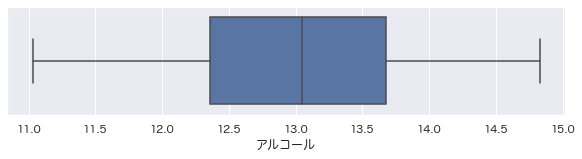

In [7]:
plt.grid()
sns.boxplot(x='アルコール', data=wine_df);

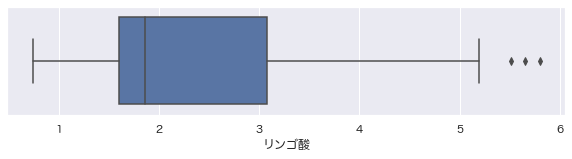

In [8]:
plt.grid()
sns.boxplot(x='リンゴ酸', data=wine_df);

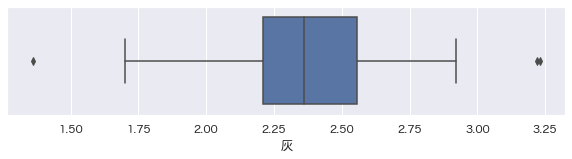

In [9]:
plt.grid()
sns.boxplot(x='灰', data=wine_df);

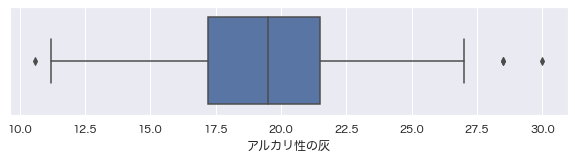

In [10]:
plt.grid()
sns.boxplot(x='アルカリ性の灰', data=wine_df);

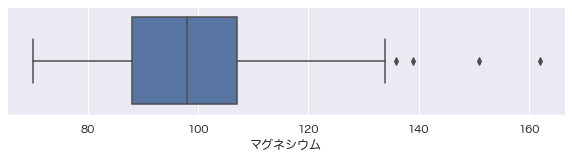

In [11]:
plt.grid()
sns.boxplot(x='マグネシウム', data=wine_df);

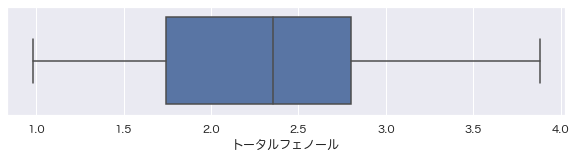

In [12]:
plt.grid()
sns.boxplot(x='トータルフェノール', data=wine_df);

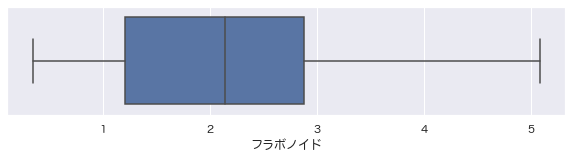

In [13]:
plt.grid()
sns.boxplot(x='フラボノイド', data=wine_df);

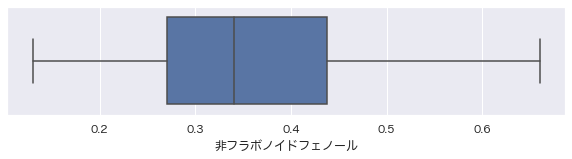

In [14]:
plt.grid()
sns.boxplot(x='非フラボノイドフェノール', data=wine_df);

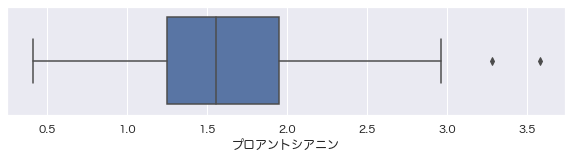

In [15]:
plt.grid()
sns.boxplot(x='プロアントシアニン', data=wine_df);

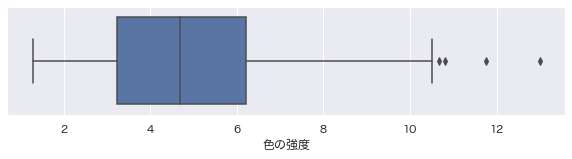

In [16]:
plt.grid()
sns.boxplot(x='色の強度', data=wine_df);

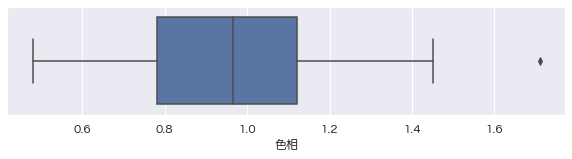

In [17]:
plt.grid()
sns.boxplot(x='色相', data=wine_df);

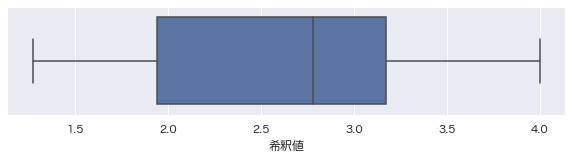

In [18]:
plt.grid()
sns.boxplot(x='希釈値', data=wine_df);

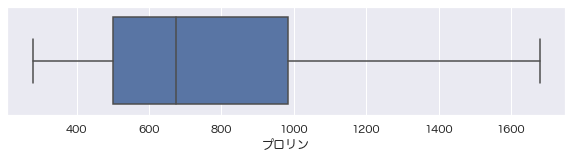

In [19]:
plt.grid()
sns.boxplot(x='プロリン', data=wine_df);

## 外れ値除去

In [20]:
# 外れ値除去
wine_cut = wine_df.copy()
wine_cut.shape
wine_cut = wine_cut[wine_cut['リンゴ酸'] < 5.5]
wine_cut.shape
wine_cut = wine_cut[wine_cut['灰'] < 3]
wine_cut.shape
wine_cut = wine_cut[wine_cut['灰'] > 1.5]
wine_cut.shape
wine_cut = wine_cut[wine_cut['マグネシウム'] < 140]
wine_cut.shape
wine_cut = wine_cut[wine_cut['プロアントシアニン'] < 3]
wine_cut.shape
wine_cut = wine_cut[wine_cut['色の強度'] < 12]
wine_cut.shape
wine_cut = wine_cut[wine_cut['色相'] < 1.6]
wine_cut.shape

(178, 13)

(175, 13)

(173, 13)

(172, 13)

(170, 13)

(169, 13)

(168, 13)

(167, 13)

# データ確認②

## 欠損値

In [21]:
# 欠損値
missing_values = pd.DataFrame()
for column in wholesale_customers.columns:
    missing_values[column] = [wholesale_customers[wholesale_customers[column].isnull()].shape[0]]
missing_values.T

,0
チャンネル,0
地域,0
新鮮さ,0
ミルク,0
食料品,0
冷凍,0
洗剤紙,0
デリカテッセン,0


## 重複行確認

In [22]:
# 重複行確認
duplicated = pd.DataFrame()
duplicated["重複行数"] = [wholesale_customers[wholesale_customers.duplicated()].shape[0]]
duplicated

,重複行数
0,0


## 箱ひげ図

In [23]:
plt.rcParams["figure.figsize"] = [10,2] # 表示サイズ

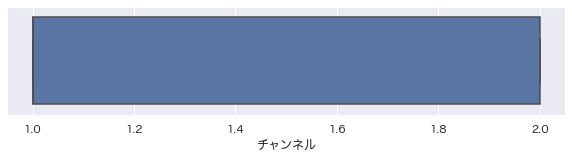

In [24]:
plt.grid()
sns.boxplot(x='チャンネル', data=wholesale_customers);

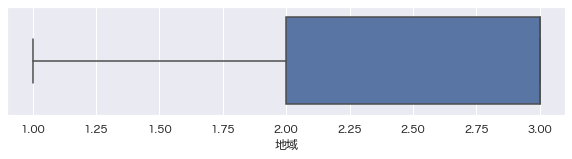

In [25]:
plt.grid()
sns.boxplot(x='地域', data=wholesale_customers);

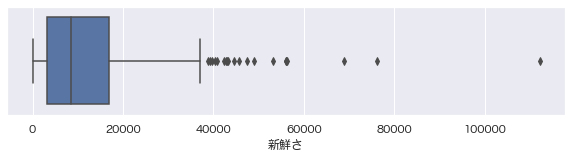

In [26]:
plt.grid()
sns.boxplot(x='新鮮さ', data=wholesale_customers);

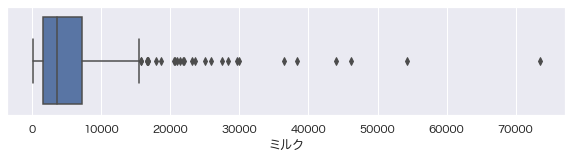

In [27]:
plt.grid()
sns.boxplot(x='ミルク', data=wholesale_customers);

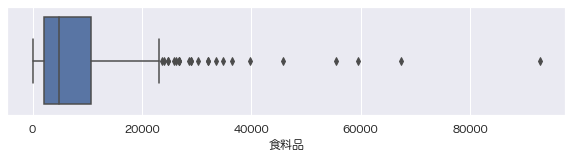

In [28]:
plt.grid()
sns.boxplot(x='食料品', data=wholesale_customers);

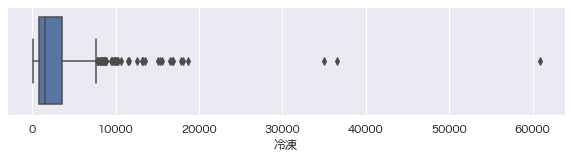

In [29]:
plt.grid()
sns.boxplot(x='冷凍', data=wholesale_customers);

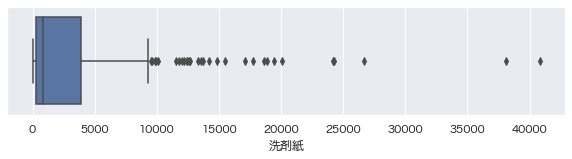

In [30]:
plt.grid()
sns.boxplot(x='洗剤紙', data=wholesale_customers);

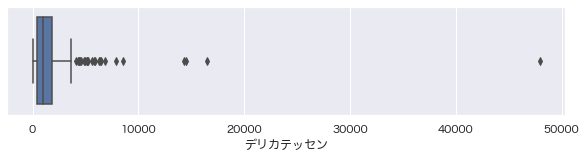

In [31]:
plt.grid()
sns.boxplot(x='デリカテッセン', data=wholesale_customers);

In [32]:
# ヒストグラム

In [33]:
plt.rcParams["figure.figsize"] = [8,5] # 表示サイズ

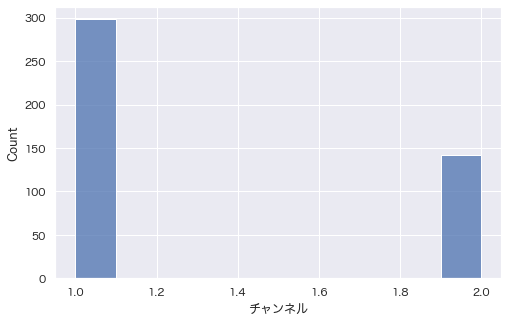

In [34]:
plt.grid()
sns.histplot(wholesale_customers['チャンネル']);

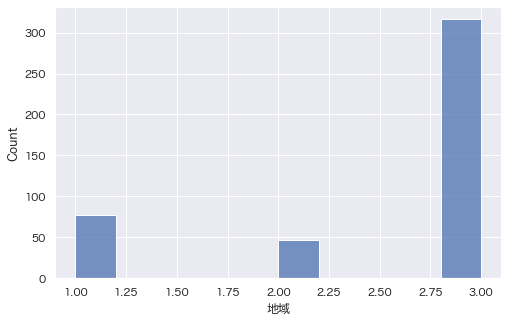

In [35]:
plt.grid()
sns.histplot(wholesale_customers['地域']);

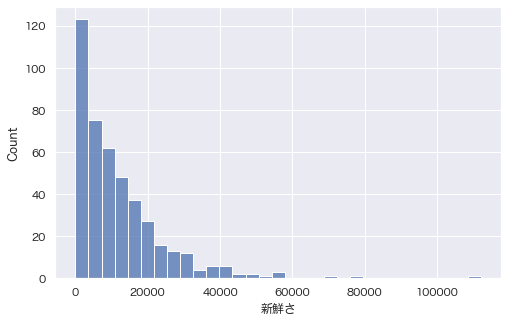

In [36]:
plt.grid()
sns.histplot(wholesale_customers['新鮮さ']);

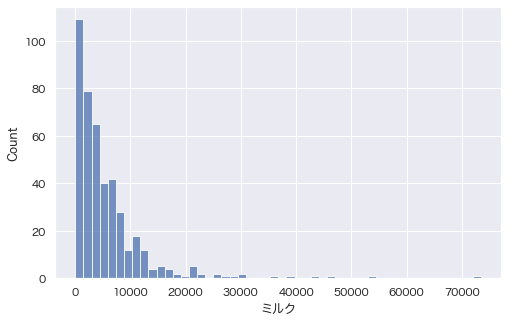

In [37]:
plt.grid()
sns.histplot(wholesale_customers['ミルク']);

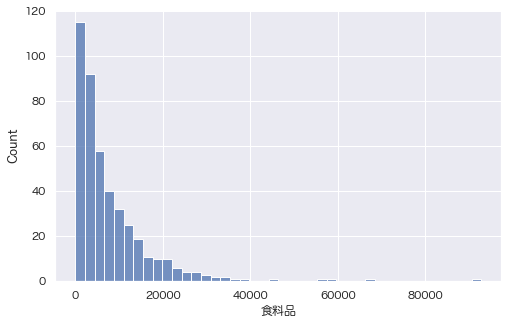

In [38]:
plt.grid()
sns.histplot(wholesale_customers['食料品']);

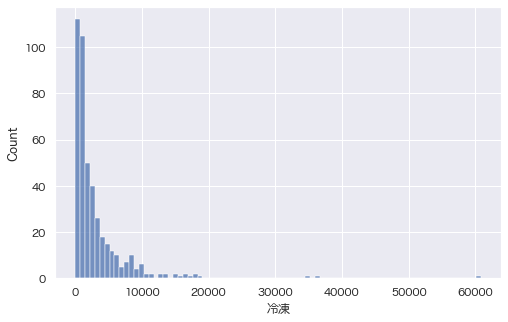

In [39]:
plt.grid()
sns.histplot(wholesale_customers['冷凍']);

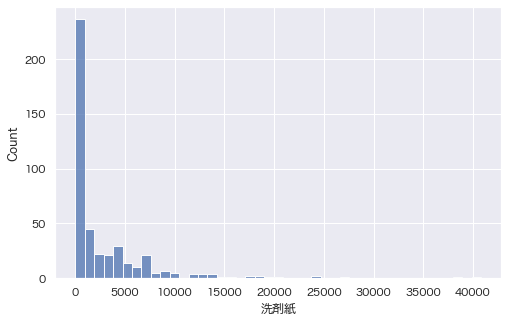

In [40]:
plt.grid()
sns.histplot(wholesale_customers['洗剤紙']);

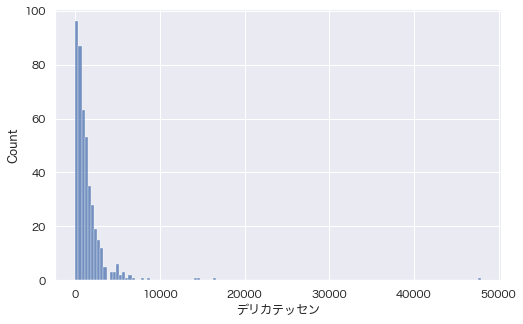

In [41]:
plt.grid()
sns.histplot(wholesale_customers['デリカテッセン']);

In [42]:
# 散布図

In [43]:
plt.rcParams["figure.figsize"] = [4,4] # 表示サイズ

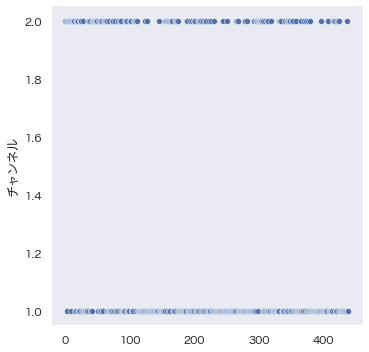

In [44]:
sns.relplot(data=wholesale_customers['チャンネル']);

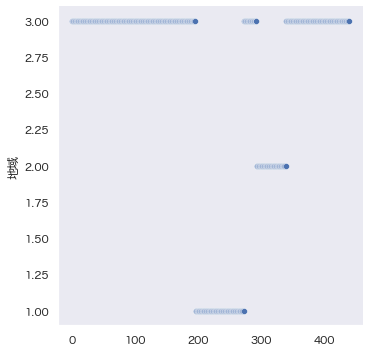

In [45]:
sns.relplot(data=wholesale_customers['地域']);

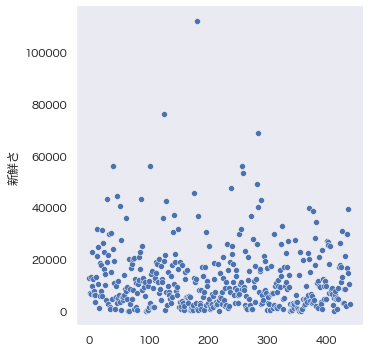

In [46]:
sns.relplot(data=wholesale_customers['新鮮さ']);

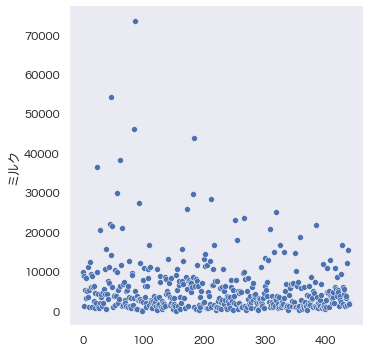

In [47]:
sns.relplot(data=wholesale_customers['ミルク']);

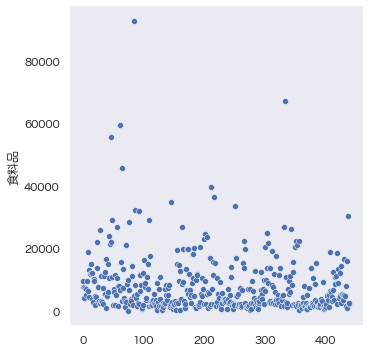

In [48]:
sns.relplot(data=wholesale_customers['食料品']);

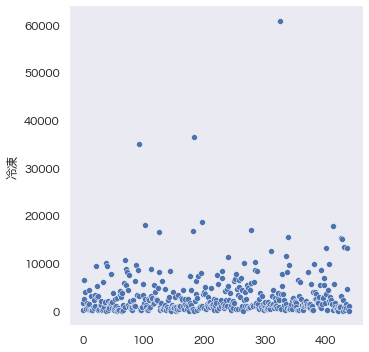

In [49]:
sns.relplot(data=wholesale_customers['冷凍']);

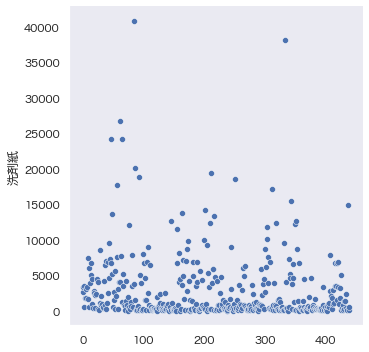

In [50]:
sns.relplot(data=wholesale_customers['洗剤紙']);

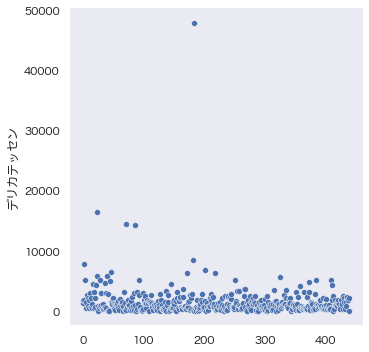

In [51]:
sns.relplot(data=wholesale_customers['デリカテッセン']);

## 外れ値除去

In [52]:
# 外れ値除去
wholesale_cut = wholesale_customers.copy()
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['新鮮さ'] < 50000]
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['ミルク'] < 25000]
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['食料品'] < 30000]
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['冷凍'] < 15000]
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['洗剤紙'] < 20000]
wholesale_cut.shape
wholesale_cut = wholesale_cut[wholesale_cut['デリカテッセン'] < 10000]
wholesale_cut.shape

(440, 8)

(433, 8)

(422, 8)

(416, 8)

(408, 8)

(408, 8)

(406, 8)

# 特徴量選択・削除

In [53]:
wholesale_drop = wholesale_cut.copy()
wholesale_drop = wholesale_drop.drop(columns=['チャンネル', '地域'])
wholesale_drop.head()

,新鮮さ,ミルク,食料品,冷凍,洗剤紙,デリカテッセン
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# クラスタリング

## 階層クラスタリング

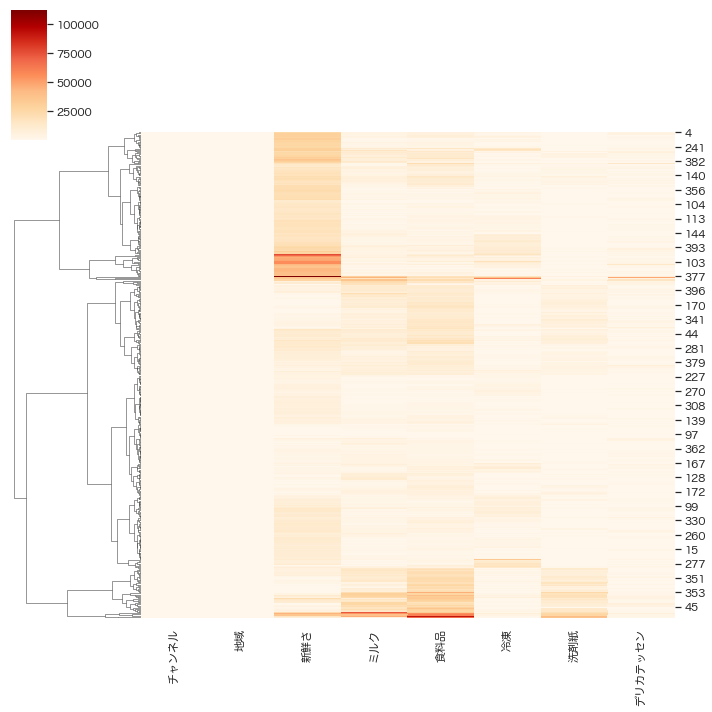

In [54]:
# ヒートマップ
sns.clustermap(wholesale_customers, method='ward', metric='euclidean', col_cluster = False, cmap='OrRd');

In [55]:
plt.rcParams["figure.figsize"] = [15,5] # 表示サイズ

In [56]:
# デンドログラム
from scipy.cluster.hierarchy import linkage, dendrogram

def plot_dendrograme(df):
    li=linkage(df.corr())
    r=dendrogram(li, labels=df.columns)
    plt.figure(figsize=[20,5])
    plt.show();

,項目名
0,アルコール
1,リンゴ酸
2,灰
3,アルカリ性の灰
4,マグネシウム
5,トータルフェノール
6,フラボノイド
7,非フラボノイドフェノール
8,プロアントシアニン
9,色の強度


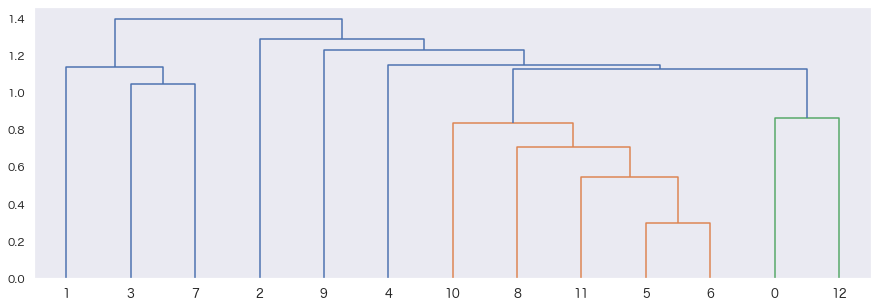

<Figure size 1440x360 with 0 Axes>

In [57]:
# ワインデータ
wine_data = wine_df.copy()
dframe = pd.DataFrame()
dframe['項目名']  = wine_df.columns
dframe

number_list = list(range(0,13))
wine_data.columns = number_list
plot_dendrograme(wine_data)

5:トータルフェノールも6:フラボノイドの一種であることから、感覚的にも分類が合っていそうである。  
また、7:非フラボノイドフェノールが5:トータルフェノールが離れた位置にあることからも、分類は合っていそうである。

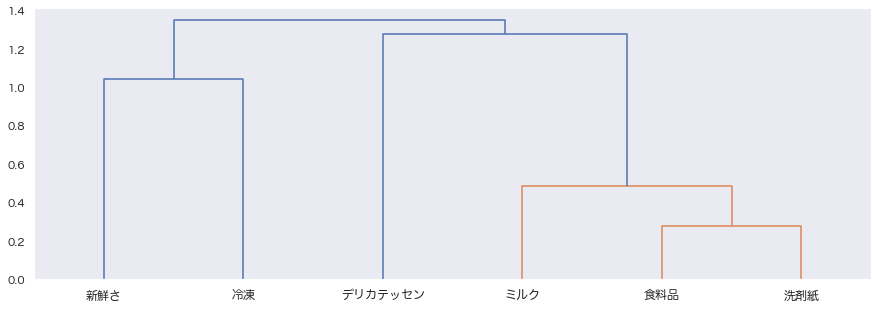

<Figure size 1440x360 with 0 Axes>

In [58]:
# 顧客データ
plot_dendrograme(wholesale_drop)

食料品とミルクの方が近しい分類になると思っていたが、食料品と洗剤紙の方が近しい結果となっている。  
一緒に購入されることが多いためであろうか。  

## 非階層クラスタリング

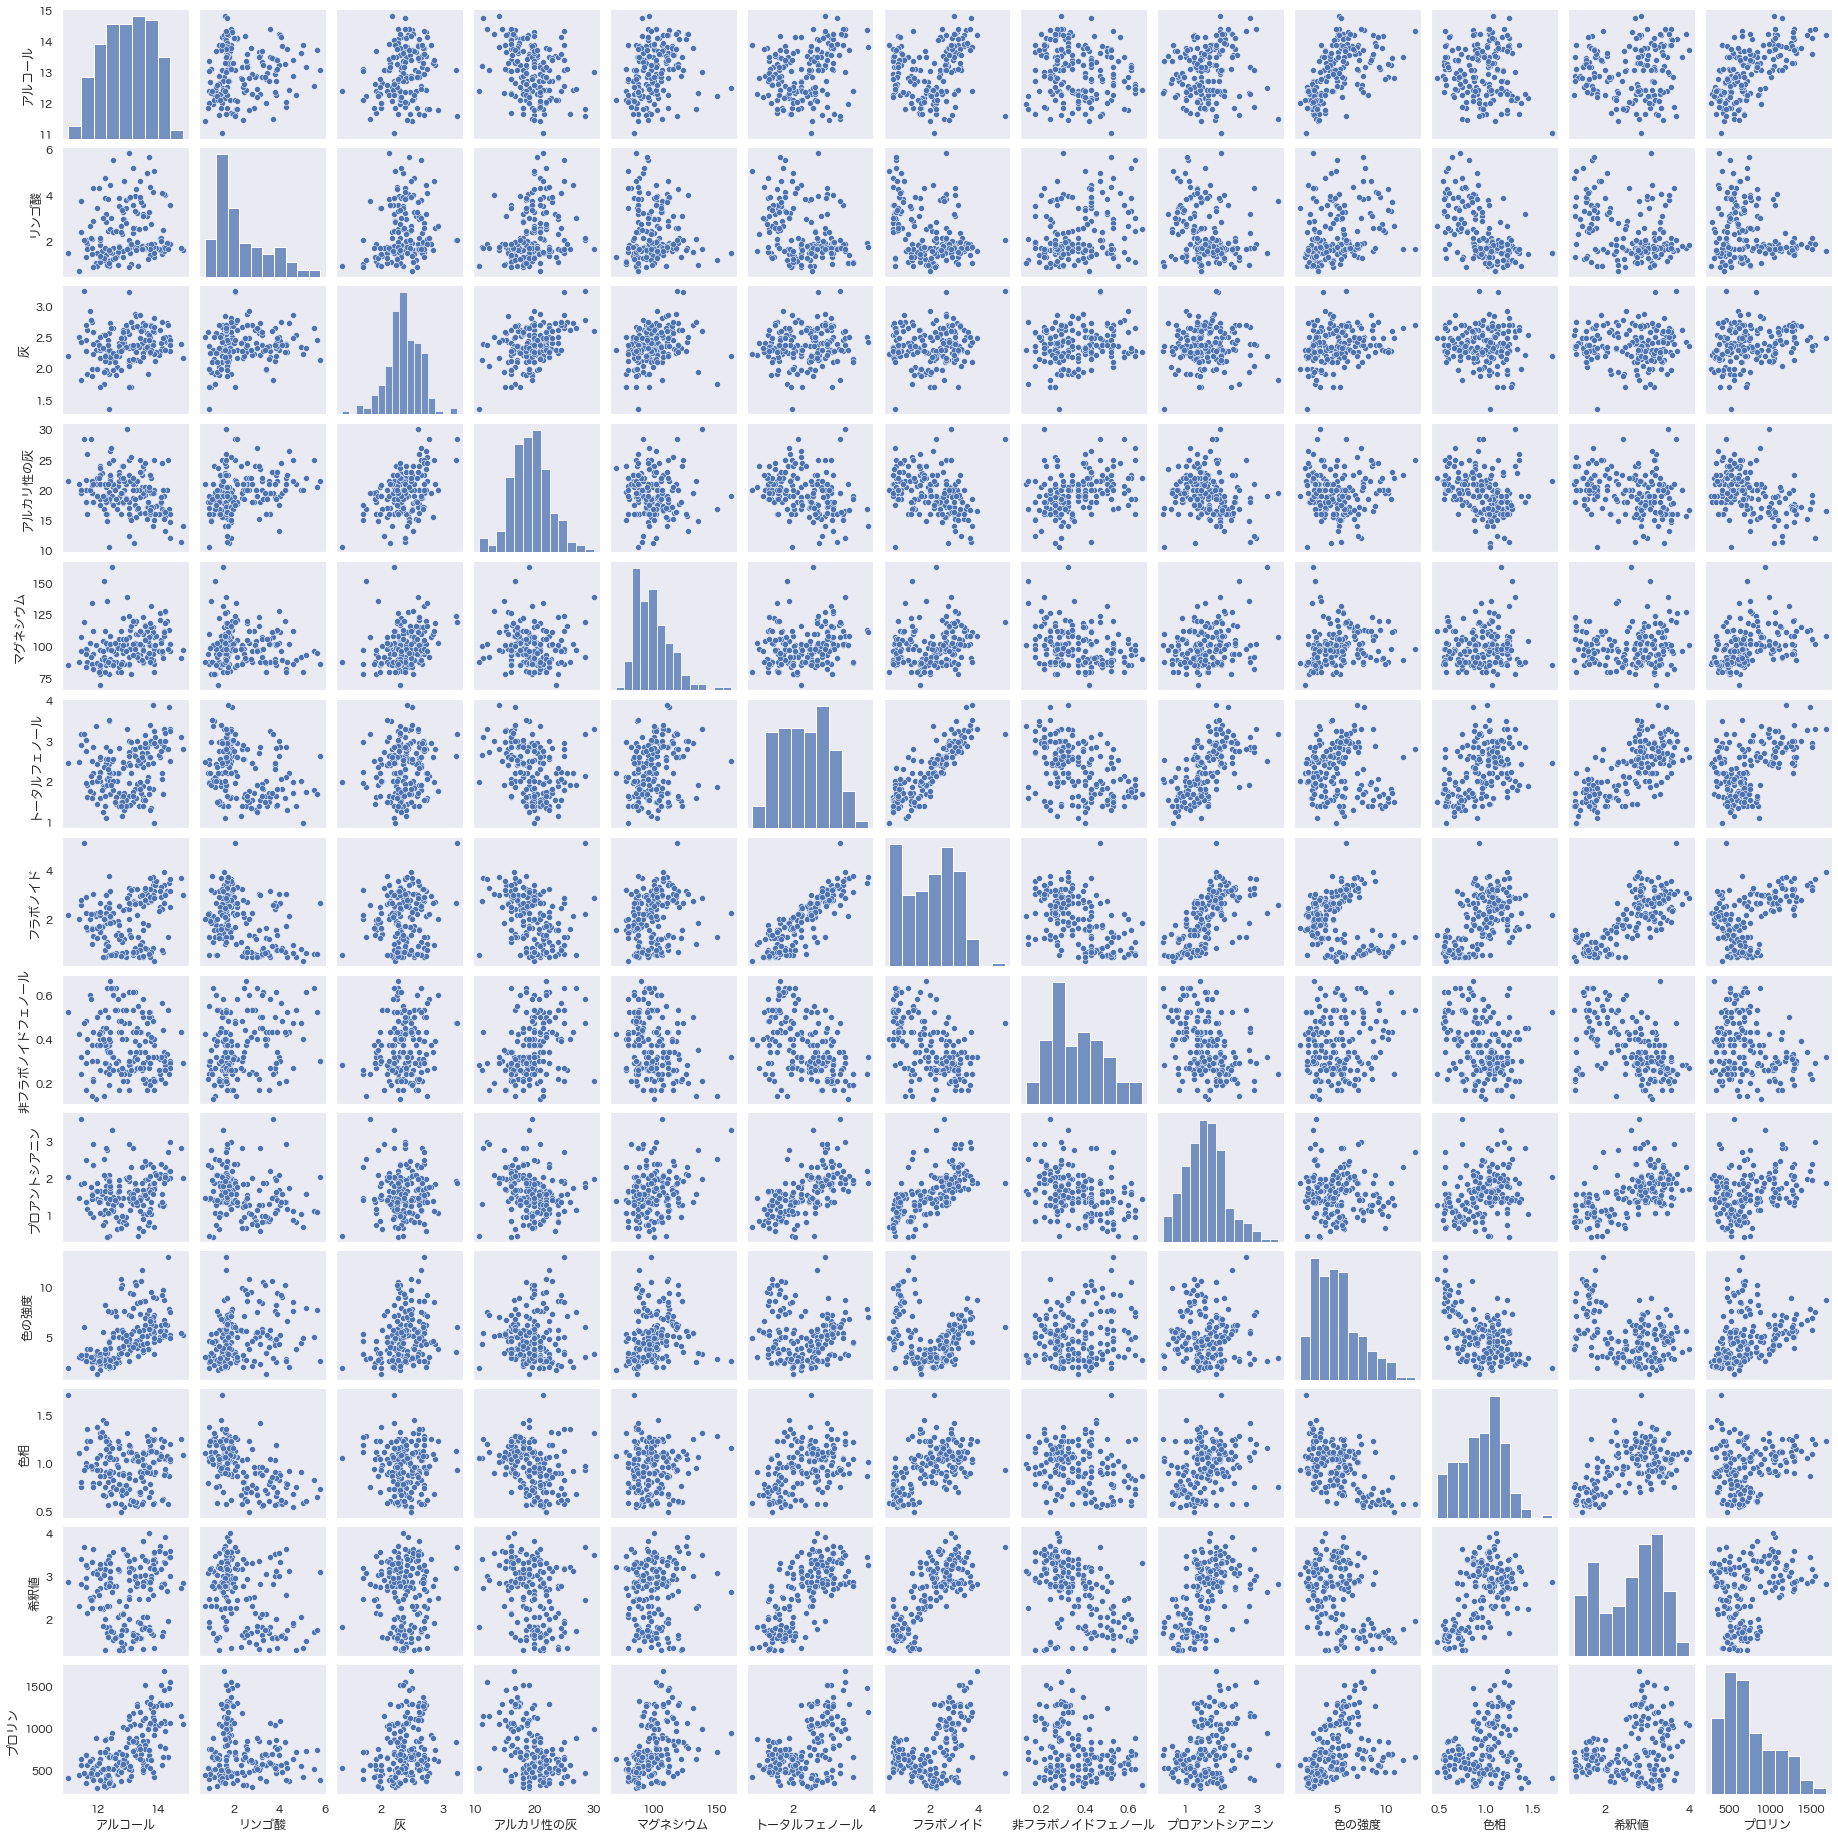

In [59]:
# 散布図行列
# ワインデータ
sns.pairplot(wine_df, height=2);

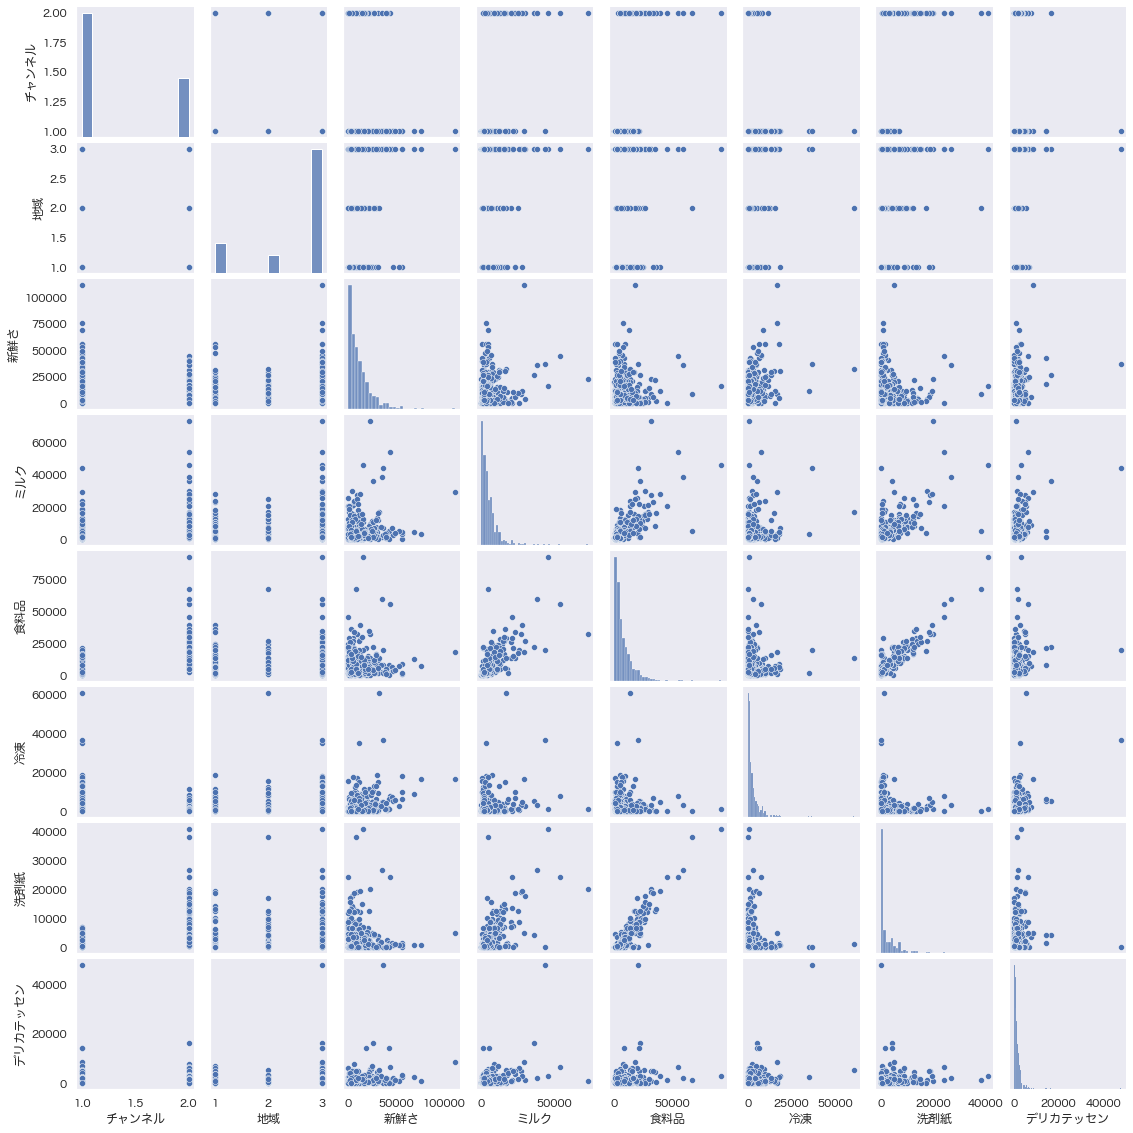

In [60]:
# 散布図行列
# 顧客データ
sns.pairplot(wholesale_customers, height=2);

# k-means法

In [65]:
# クラスタリング
from sklearn.cluster import KMeans

def clustering(df, num):
    sc = StandardScaler()
    sc.fit_transform(df)
    data_norm = sc.transform(df)

    cls = KMeans(n_clusters = num)
    result = cls.fit(data_norm)
    pred = cls.fit_predict(data_norm)

    plt.figure(figsize=[10, 5])
    plt.scatter(data_norm[:,0], data_norm[:,1], c=result.labels_)
    plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, marker='*', c='blue')
    plt.grid()
    plt.show();

## ワインデータ

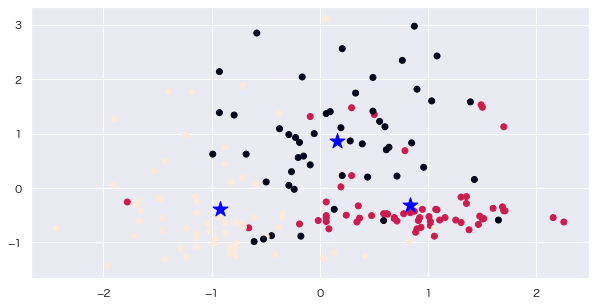

In [66]:
clustering(wine_data, 3)

## 顧客データ

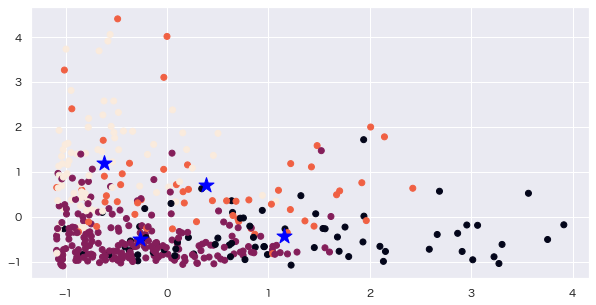

In [67]:
clustering(wholesale_drop, 4)

# エルボー法

In [68]:
# クラスター数の探索
def elbow(df):
    wcss = []

    for i in range(1, 10):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
        kmeans.fit(df.iloc[:, :])
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=[10,4])
    plt.plot(range(1, 10), wcss)
    plt.title('エルボー法')
    plt.xlabel('クラスター数')
    plt.ylabel('クラスター内平方和（WCSS）')
    plt.grid()
    plt.show();

## ワインデータ

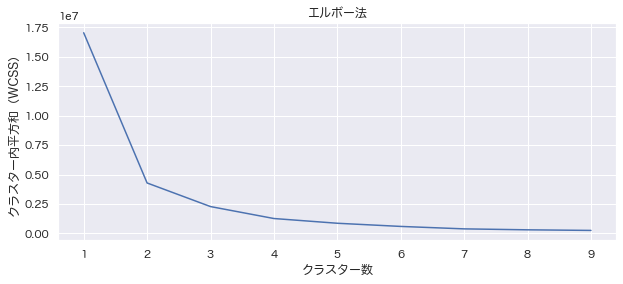

In [69]:
elbow(wine_cut)

３〜４のクラスタに分類できそうである。

## 顧客データ

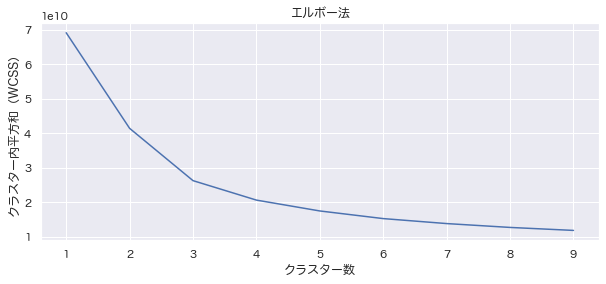

In [70]:
elbow(wholesale_drop)

４〜５のクラスタに分類できそうである。

# クラスタリング＋主成分分析

In [71]:
from sklearn.cluster import KMeans

## クラスタリング＋主成分分析
def cross(df, num):
    df_cls = df.copy()
    sc = StandardScaler()
    clustering_sc = sc.fit_transform(df_cls)

    kmeans = KMeans(n_clusters=num, random_state=42) # n_clusters：クラスター数
    clusters = kmeans.fit(clustering_sc)
    df_cls['cluster'] = clusters.labels_

    x = clustering_sc
    pca = PCA(n_components=num) # n_components：削減結果の次元数
    pca.fit(x)
    x_pca = pca.transform(x)
    pca_df = pd.DataFrame(x_pca)
    pca_df['cluster'] = df_cls['cluster']

    for i in df_cls['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster'] == i]
        plt.scatter(tmp[0], tmp[1])
    plt.grid()
    plt.show();

## ワインデータ

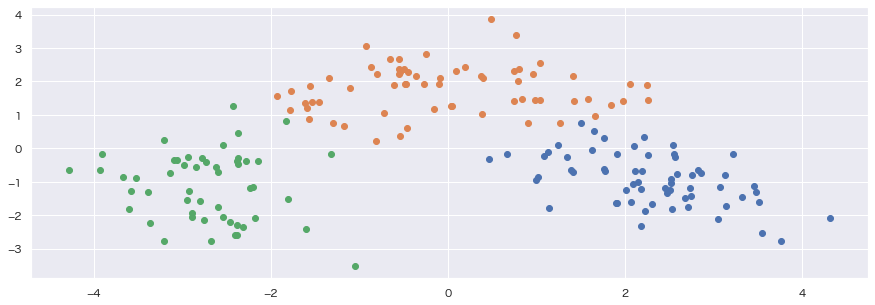

In [72]:
cross(wine_df, 3)

ワインの品質が3つのクラスタに分類できることがわかる。  
この知見から、それぞれのクラスタがどのような特徴を持っているか、更に分析・考察することができそうである。

## 顧客データ

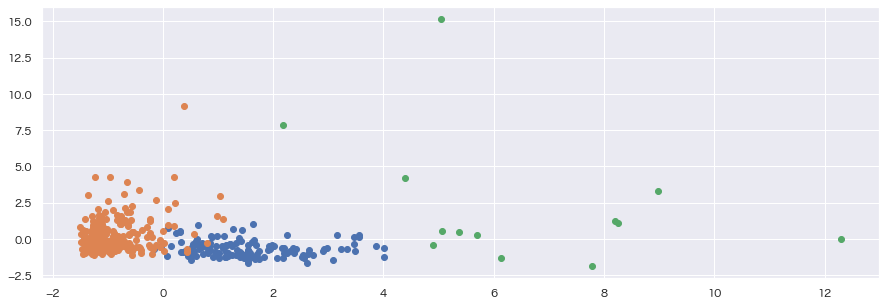

In [73]:
cross(wholesale_customers, 3)

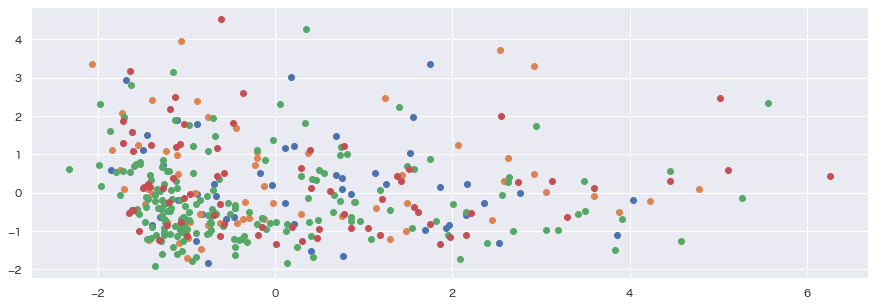

In [74]:
cross(wholesale_drop, 4)

卸売業者の顧客（取引）データは、重なり合う要素が多く、散布図ではうまくクラスタを表現できていない為、他の図で可視化する。  

## 積み上げ棒グラフ

In [82]:
def clustering_pred(df):
    sc = StandardScaler()
    sc.fit_transform(df)
    data_norm = sc.transform(df)

    cls = KMeans(n_clusters = 4)
    pred = cls.fit_predict(data_norm)

    df['クラスターID']=pred
    
    return df

In [83]:
result = clustering_pred(wholesale_drop)
result.head()

,新鮮さ,ミルク,食料品,冷凍,洗剤紙,デリカテッセン,クラスターID
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
# 積み上げ棒グラフ
cluster = pd.DataFrame()
for i in range(4):
    cluster['クラスター' + str(i+1)] = wholesale_drop[wholesale_drop['クラスターID'] == i].mean()
cluster = cluster.drop('クラスターID')

plt.figure(figsize=[20,5])
my_plot = cluster.T.plot(kind='bar', stacked=True, title="各クラスタの平均")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
plt.grid();

※考察


積み上げ棒グラフでの可視化により、各セグメント（顧客）の構成要素の把握ができるようになった。  
セグメント別に見ると、クラスタごとに、構成要素（各変数）の割合が異なっていることがわかる。  
  
クラスタ1：食料品・ミルク・洗剤紙  
クラスタ2：新鮮さ、ただし比重は少なめ  
クラスタ3：新鮮さ、比重は多め  
クラスタ4：食料品・ミルク・新鮮さ    

# KMeans++法

In [77]:
# クラスタリング（KMeans++）＋主成分分析
def cross(df, num):
    sc = StandardScaler()

    df_cls = df.copy()
    clustering_sc = sc.fit_transform(df_cls)

    kmeans = KMeans(n_clusters=num, # n_clusters：クラスター数
                    init='k-means++', # 中心の設定、中心店点（セントロイド）の初期値をk-means++法で選択
                    n_init=10, # 異なる初期値を用いた実行回数
                    max_iter=1000, # 最大イテレーション回数  default: '300'
                    tol=1e-04, # 許容する誤差
                    random_state=42
                   )
    clusters = kmeans.fit(clustering_sc)
    df_cls['cluster'] = clusters.labels_

    x = clustering_sc
    pca = PCA(n_components=num) # n_components：削減結果の次元数
    pca.fit(x)
    x_pca = pca.transform(x)
    pca_df = pd.DataFrame(x_pca)
    pca_df['cluster'] = df_cls['cluster']

    for i in df_cls['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster'] == i]
        plt.scatter(tmp[0], tmp[1])
    plt.grid()
    plt.show();

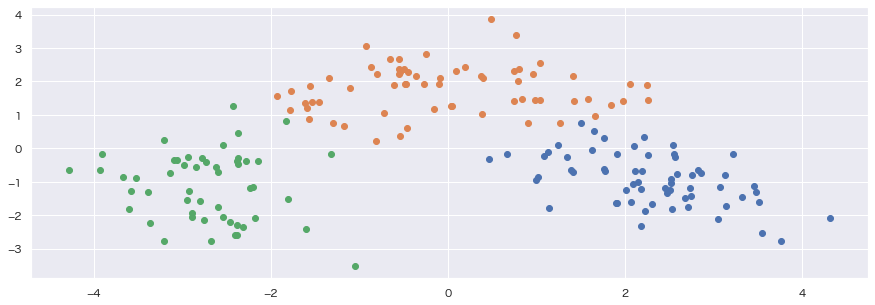

In [78]:
cross(wine_df, 3)

データセットがシンプルな為か「k-means ⇆ k-means」にあまり大きな違いは検出されなかった。

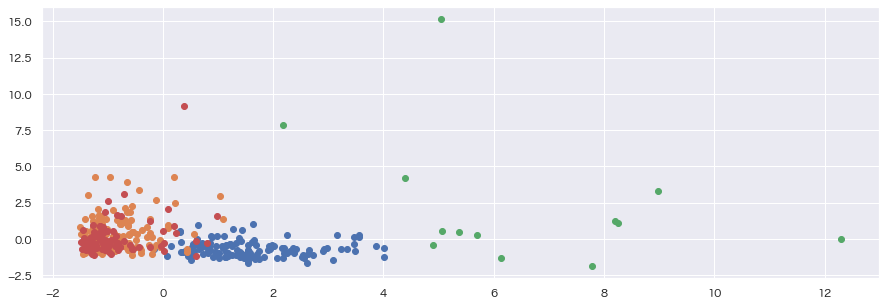

In [79]:
cross(wholesale_customers, 4)

外れ値を除外していない結果  
こちらも重なりある要素は多いものの、サンプル数が少なくシンプルなデータの為か「k-means ⇆ k-means」にあまり大きな違いは検出されなかった。

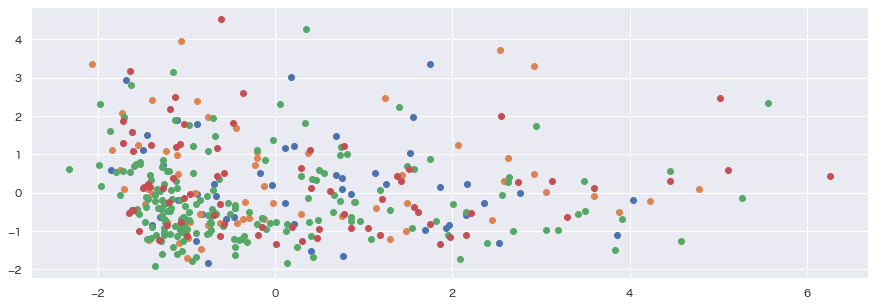

In [80]:
cross(wholesale_drop, 4)

外れ値を除外した結果  
卸売業者の顧客（取引）データは、面でのグルーピングはやはり不可。  
各セグメントの構成要素を分析する目的からも、やはり積み上げ棒グラフでの可視化が効果的と思われる。  

# 特徴量生成

In [81]:
# 重心からの距離
from sklearn.cluster import KMeans
num_cluster=3 # cluster数

clusters = KMeans(n_clusters=num_cluster, random_state = 42)
clusters.fit(wine_cut)
centers = clusters.cluster_centers_
 
columns = wine_cut.columns
clust_features = pd.DataFrame(index = wine_cut.index)
for i in range(len(centers)):
    clust_features['クラスタ' + str(i + 1) + 'との距離'] = (wine_cut[columns] - centers[i]).applymap(abs).apply(sum, axis = 1)
    
clust_features

KMeans(n_clusters=3, random_state=42)

,クラスタ1との距離,クラスタ2との距離,クラスタ3との距離
0,380,155,660
1,344,160,618
2,471,19,749
3,783,298,1062
4,36,481,311
...,...,...,...
172,80,564,217
174,38,465,316
175,141,392,421
176,143,384,423


今回は特徴量の生成までの実装とする。別途、モデル精度への影響を考察する。